In [13]:
import pandas as pd
import seaborn as sns
import pytz
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [14]:
df = pd.read_csv('../data/20230413_clb_taps.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df

,Datetime,Device Code,Direction
0,2023-04-12 23:24:03+00:00,RT046205,Entry
1,2023-04-13 00:25:35+00:00,RT046205,Entry
2,2023-04-13 00:33:41+00:00,RT061806,Exit
3,2023-04-13 00:57:25+00:00,LBCTR,Entry
4,2023-04-13 00:57:43+00:00,RT046203,Entry
...,...,...,...
9641,2023-04-13 12:48:10+00:00,LBCTR,Exit
9642,2023-04-13 12:48:26+00:00,LBCTR,Exit
9643,2023-04-13 12:48:42+00:00,LBCTR,Exit
9644,2023-04-13 12:53:06+00:00,LBCTR,Exit


In [23]:
new_df = df.copy()
sgt_timezone = pytz.timezone('Asia/Singapore')
new_df['Datetime'] = new_df['Datetime'].dt.tz_convert(sgt_timezone)
new_df['Entry'] = new_df['Direction'].replace({'Entry':1, 'Exit':-1})
new_df = new_df.sort_values('Datetime')
new_df['Time'] = new_df['Datetime'].dt.strftime('%H:%M:%S')
new_df['Occupancy'] = new_df['Entry'].cumsum()
new_df

,Datetime,Device Code,Direction,Entry,Time,Occupancy
6053,2023-04-13 06:57:39+08:00,RT046205,Entry,1,06:57:39,1
4898,2023-04-13 07:21:44+08:00,RT046205,Entry,1,07:21:44,2
4899,2023-04-13 07:21:46+08:00,RT046203,Entry,1,07:21:46,3
0,2023-04-13 07:24:03+08:00,RT046205,Entry,1,07:24:03,4
2294,2023-04-13 07:30:41+08:00,RT046205,Entry,1,07:30:41,5
...,...,...,...,...,...,...
6052,2023-04-13 20:56:40+08:00,RT046204,Exit,-1,20:56:40,202
3445,2023-04-13 20:56:42+08:00,RT046206,Exit,-1,20:56:42,201
4897,2023-04-13 20:57:41+08:00,LBCTR,Exit,-1,20:57:41,200
8579,2023-04-13 20:57:59+08:00,RT046204,Exit,-1,20:57:59,199


<Axes: xlabel='Datetime', ylabel='Occupancy'>

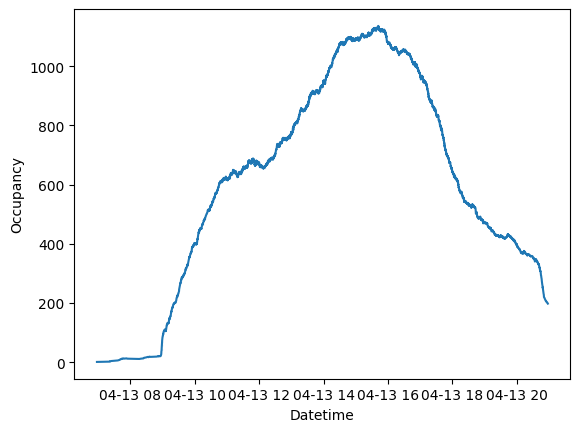

In [28]:
sns.lineplot(new_df, x='Datetime', y='Occupancy')

Distribution of people throughout the day. Shows the peak hours and movement of people in and out of the library, could be used to find hours to patrol to prevent seat hogging. As we can see from the plot on this particular day, occupancy is highest after lunch around 4pm is where the occcupancy reachest its peak.

<Axes: xlabel='Datetime', ylabel='Count'>

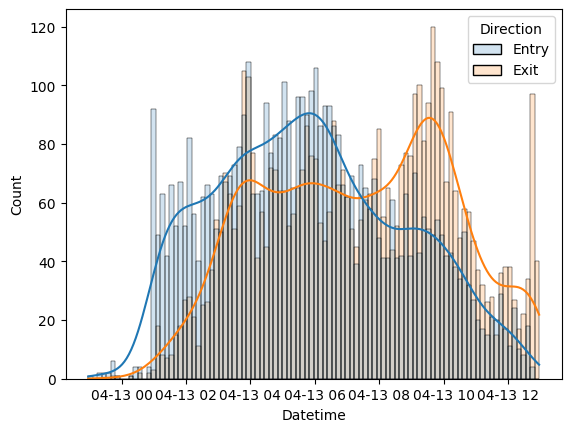

In [7]:
sns.histplot(df, x='Datetime', hue='Direction',bins=100,kde=True,alpha=0.2)

Data analysis regarding entry and exit timings offers a strategic advantage beyond mere occupancy levels. Understanding the specific timeframes with higher footfall aids in optimizing crowd flow. Together with the distribution of individuals across different entry points, we might be able to prioritize directions. By discerning peak entry and exit periods, efficient crowd management strategies can be developed, improving the overall movement of people and ensuring smoother traffic distribution across gates, leading to a more organized and optimized flow.

In [8]:
new_df = df.set_index('Datetime')
entry = new_df[new_df['Direction']=='Entry']['Direction'].resample('10min',  label='left').count().reset_index()
exit = new_df[new_df['Direction']=='Exit']['Direction'].resample('10min',  label='left').count().reset_index()
entry_exit = pd.merge(
    entry,
    exit,
    how='outer',
    on='Datetime'
)
entry_exit.columns = ['Datetime', 'Entry', 'Exit']
entry_exit = entry_exit.fillna(0)
entry_exit

,Datetime,Entry,Exit
0,2023-04-12 22:50:00+00:00,1.0,0.0
1,2023-04-12 23:00:00+00:00,0.0,0.0
2,2023-04-12 23:10:00+00:00,0.0,0.0
3,2023-04-12 23:20:00+00:00,3.0,0.0
4,2023-04-12 23:30:00+00:00,3.0,0.0
...,...,...,...
80,2023-04-13 12:10:00+00:00,22.0,32.0
81,2023-04-13 12:20:00+00:00,13.0,17.0
82,2023-04-13 12:30:00+00:00,18.0,40.0
83,2023-04-13 12:40:00+00:00,7.0,107.0


<Axes: xlabel='Datetime', ylabel='Entry'>

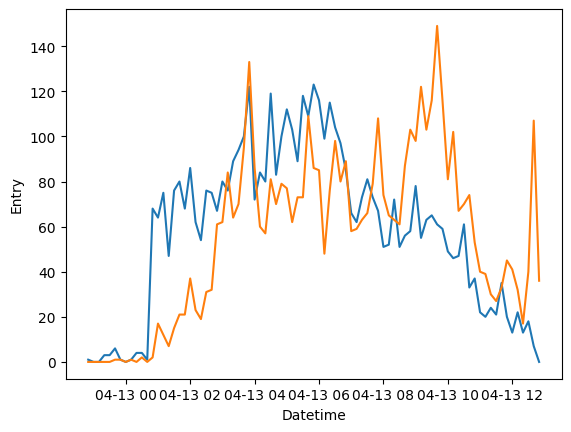

In [9]:
sns.lineplot(entry_exit, x='Datetime', y='Entry')
sns.lineplot(entry_exit, x='Datetime', y='Exit')

Possible things to measure:
- \# of hours studied (turnover), correlated with the levels they prefer to go to, e.g. level 6 low turnover but level 3 high turnover
    - depends on the time they come to library
    - depends on level they study
- preference for factors they take into account (rank/score importance 1-10)
- Seat hogging????

In [10]:
new_df2 = pd.read_csv('../Data/dsa_data.csv')
new_df2['Datetime'] = pd.to_datetime(new_df2['Datetime'])
new_df2.dropna(subset = ['User Number'], inplace=True)
new_df2 = new_df2[(new_df2['Direction']=='Entry') | (new_df2['Direction'] == 'Exit')]
sgt_timezone = pytz.timezone('Asia/Singapore')
new_df2['Datetime'] = new_df2['Datetime'].dt.tz_convert(sgt_timezone)
new_df2['Entry'] = new_df2['Direction'].replace({'Entry':1, 'Exit':-1})
new_df2 = new_df2.sort_values('Datetime')
new_df2['Date'] = new_df2['Datetime'].dt.date
new_df2['Date'] = new_df2['Datetime'].dt.strftime('%Y-%m-%d')
new_df2['Day_of_Week'] = new_df2['Datetime'].dt.strftime('%A')
new_df2['Week_Number'] = new_df2['Datetime'].dt.strftime('%U')
new_df2

,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number
0,2023-01-25 07:29:13+08:00,2483.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04
1,2023-01-25 07:32:15+08:00,4372.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04
2,2023-01-25 07:32:35+08:00,2.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04
3,2023-01-25 07:32:45+08:00,7405.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04
4,2023-01-25 07:32:49+08:00,2182.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04
...,...,...,...,...,...,...,...,...,...,...
127874,2023-04-29 17:00:52+08:00,7423.0,Library Professional,Central Library,Card,Exit,-1,2023-04-29,Saturday,17
127913,2023-04-29 17:36:09+08:00,6427.0,Undergraduate,Central Library,Card,Entry,1,2023-04-29,Saturday,17
127914,2023-04-29 17:37:28+08:00,4318.0,Administrative Staff,Central Library,Card,Entry,1,2023-04-29,Saturday,17
127917,2023-04-29 17:38:18+08:00,4318.0,Administrative Staff,Central Library,Card,Exit,-1,2023-04-29,Saturday,17


In [11]:
#reading weeks
new_df2['Week_type'] = 'Normal'
new_df2['Date'] = pd.to_datetime(new_df2['Date'])
date_range = new_df2[(new_df2['Date'] >= '2023-02-18') & (new_df2['Date'] <= '2023-02-26')|(new_df2['Date'] >= '2023-04-15') & (new_df2['Date'] <= '2023-04-21')]
date_range['Week_type'] = 'Reading'
new_df2.update(date_range)
new_df2

C:\Users\lakbo\AppData\Local\Temp\ipykernel_44692\1585327047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_range['Week_type'] = 'Reading'


,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number,Week_type
0,2023-01-25 07:29:13+08:00,2483.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
1,2023-01-25 07:32:15+08:00,4372.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
2,2023-01-25 07:32:35+08:00,2.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
3,2023-01-25 07:32:45+08:00,7405.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
4,2023-01-25 07:32:49+08:00,2182.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
...,...,...,...,...,...,...,...,...,...,...,...
127874,2023-04-29 17:00:52+08:00,7423.0,Library Professional,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Normal
127913,2023-04-29 17:36:09+08:00,6427.0,Undergraduate,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Normal
127914,2023-04-29 17:37:28+08:00,4318.0,Administrative Staff,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Normal
127917,2023-04-29 17:38:18+08:00,4318.0,Administrative Staff,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Normal


In [12]:
#Exam weeks
date_range = new_df2[(new_df2['Date'] >= '2023-02-27') & (new_df2['Date'] <= '2023-03-04')|(new_df2['Date'] >= '2023-04-22') & (new_df2['Date'] <= '2023-05-06')]
date_range['Week_type'] = 'Exam'
new_df2.update(date_range)
new_df2

C:\Users\lakbo\AppData\Local\Temp\ipykernel_44692\1495230533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_range['Week_type'] = 'Exam'


,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number,Week_type
0,2023-01-25 07:29:13+08:00,2483.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
1,2023-01-25 07:32:15+08:00,4372.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
2,2023-01-25 07:32:35+08:00,2.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
3,2023-01-25 07:32:45+08:00,7405.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
4,2023-01-25 07:32:49+08:00,2182.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
...,...,...,...,...,...,...,...,...,...,...,...
127874,2023-04-29 17:00:52+08:00,7423.0,Library Professional,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Exam
127913,2023-04-29 17:36:09+08:00,6427.0,Undergraduate,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Exam
127914,2023-04-29 17:37:28+08:00,4318.0,Administrative Staff,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Exam
127917,2023-04-29 17:38:18+08:00,4318.0,Administrative Staff,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Exam


In [13]:
#Finding occupancy throughout the day for the days give
new_df2['Occupancy'] = new_df2.groupby('Date')['Entry'].cumsum()
new_df2

,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number,Week_type,Occupancy
0,2023-01-25 07:29:13+08:00,2483.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,1
1,2023-01-25 07:32:15+08:00,4372.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,2
2,2023-01-25 07:32:35+08:00,2.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,3
3,2023-01-25 07:32:45+08:00,7405.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,4
4,2023-01-25 07:32:49+08:00,2182.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,5
...,...,...,...,...,...,...,...,...,...,...,...,...
127874,2023-04-29 17:00:52+08:00,7423.0,Library Professional,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Exam,80
127913,2023-04-29 17:36:09+08:00,6427.0,Undergraduate,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Exam,81
127914,2023-04-29 17:37:28+08:00,4318.0,Administrative Staff,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Exam,82
127917,2023-04-29 17:38:18+08:00,4318.0,Administrative Staff,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Exam,81


Text(0.5, 1.0, 'Occupancy Over Time')

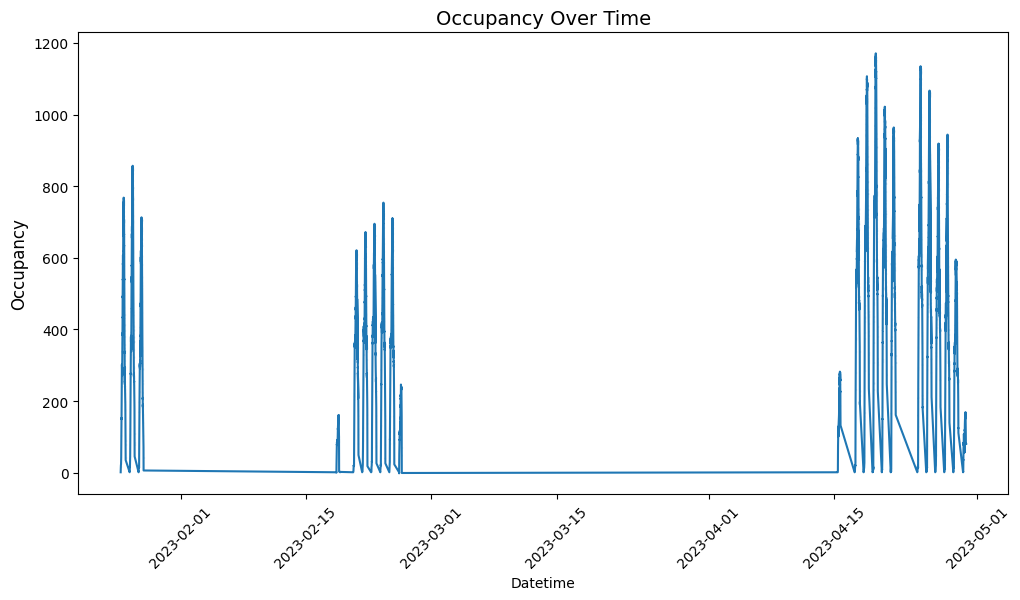

In [14]:
#visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(new_df2, x='Datetime', y='Occupancy')
plt.xticks(rotation=45, fontsize=10)    
plt.ylabel('Occupancy', fontsize=12)
plt.title('Occupancy Over Time', fontsize=14)

In [15]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
def entry_count_finder(df):
    day_counts = {}
    for day in day_order:
        day_df = df[df['Day_of_Week'] == day]
        unique_dates_count = day_df['Date'].nunique()
        day_counts[day] = unique_dates_count
    df_entry_counts = df[df['Direction'] == 'Entry'].groupby('Day_of_Week')['Entry'].count()
    daily_entry_counts_df = pd.DataFrame({'Entry_Count': df_entry_counts})
    daily_entry_counts_df = daily_entry_counts_df.reset_index()
    daily_entry_counts_df['Day_of_Week'] = pd.Categorical(daily_entry_counts_df['Day_of_Week'], categories=day_order, ordered=True)
    daily_entry_counts_df = daily_entry_counts_df.sort_values('Day_of_Week')
    daily_entry_counts_df = daily_entry_counts_df.reset_index(drop=True)
    daily_entry_counts_df['Entry_Count'] = daily_entry_counts_df['Entry_Count'] / daily_entry_counts_df['Day_of_Week'].map(day_counts)
    return daily_entry_counts_df

In [16]:
#exam week
exam_week_df = new_df2[new_df2['Week_type'] == 'Exam']
exam_daily_entry_counts_df = entry_count_finder(exam_week_df)
exam_daily_entry_counts_df



,Day_of_Week,Entry_Count
0,Monday,4098.0
1,Tuesday,3891.0
2,Wednesday,3319.0
3,Thursday,3182.0
4,Friday,2470.0
5,Saturday,610.0


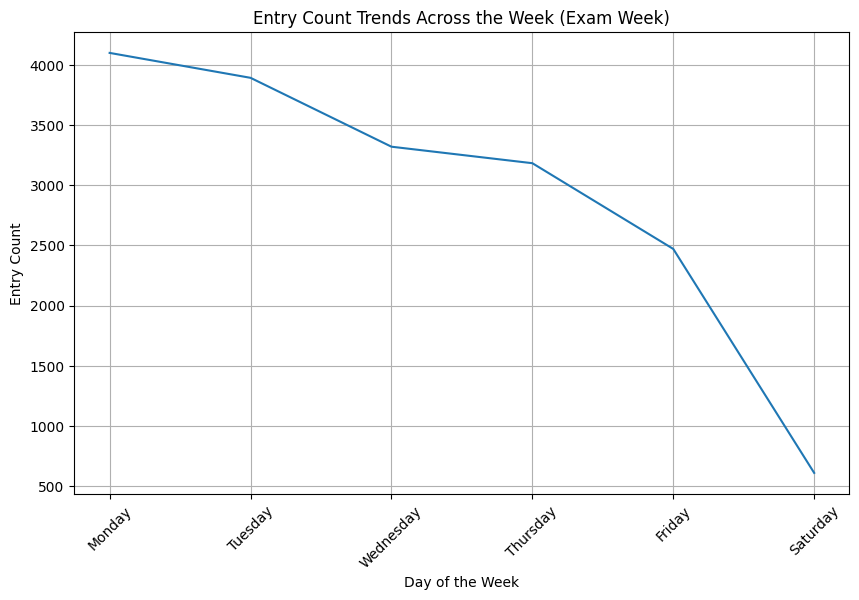

In [17]:
#visualisation of trend during exam weeks
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(exam_daily_entry_counts_df['Day_of_Week'], exam_daily_entry_counts_df['Entry_Count'])
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week (Exam Week)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

By separating exam and non-exam weeks, we are better able to examine the trend for the number of entries during the exam week so as to provide valuable insights for event planning. As we can see from the graph as the week goes by there is a general decrease in the number of entry counts with a huge dip during the weekend

In [18]:
#reading
reading_week_df = new_df2[new_df2['Week_type'] == 'Reading']
reading_daily_entry_counts_df = entry_count_finder(reading_week_df)
reading_daily_entry_counts_df

,Day_of_Week,Entry_Count
0,Monday,2643.000000
1,Tuesday,3062.500000
2,Wednesday,3119.000000
3,Thursday,2956.500000
4,Friday,2816.500000
5,Saturday,554.666667


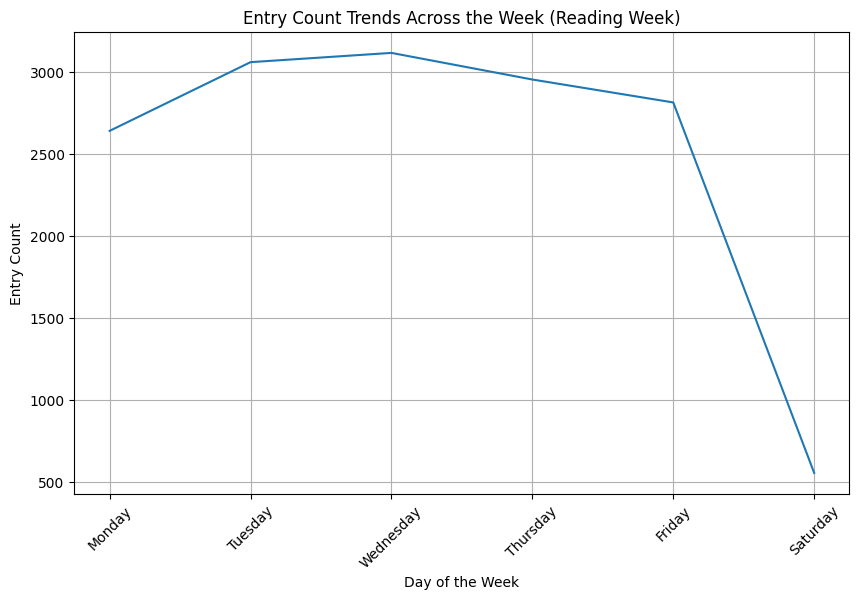

In [19]:
#trend across the week for reading weeks
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(reading_daily_entry_counts_df['Day_of_Week'], reading_daily_entry_counts_df['Entry_Count'])
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week (Reading Week)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

By separating exam and non-exam weeks, we are better able to examine the trend for the number of entries during the reading week so as to provide valuable insights for event planning.

In [20]:
#normal
normal_week_df = new_df2[new_df2['Week_type'] == 'Normal']
normal_daily_entry_counts_df = entry_count_finder(normal_week_df)
normal_daily_entry_counts_df

,Day_of_Week,Entry_Count
0,Wednesday,2877.0
1,Thursday,3190.0
2,Friday,2644.0


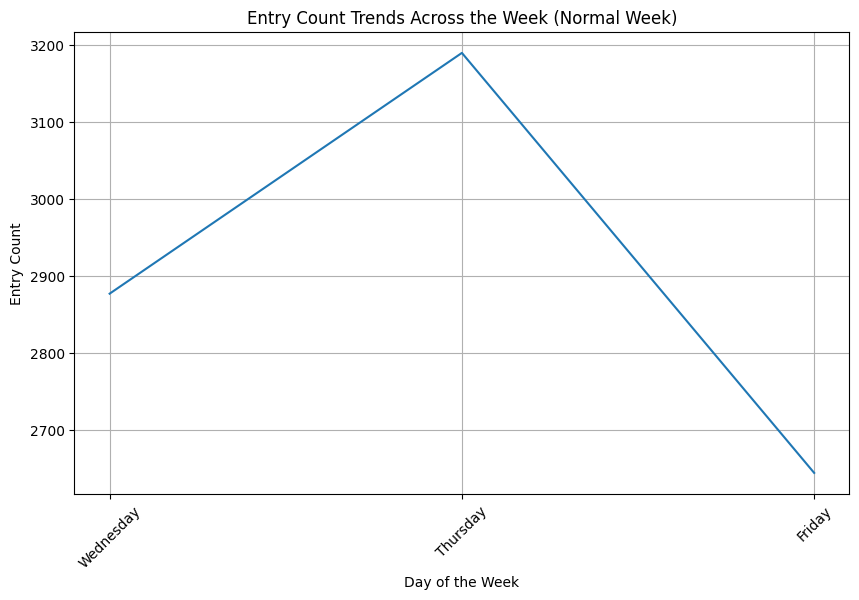

In [21]:
#trend during normal week
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(normal_daily_entry_counts_df['Day_of_Week'], normal_daily_entry_counts_df['Entry_Count'])
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week (Normal Week)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [22]:
#check
day_counts = {}
for day in day_order:
    day_df = new_df2[new_df2['Day_of_Week'] == day]
    unique_dates_count = day_df['Date'].nunique()
    day_counts[day] = unique_dates_count
day_counts

{'Monday': 3,
 'Tuesday': 3,
 'Wednesday': 4,
 'Thursday': 4,
 'Friday': 4,
 'Saturday': 4,
 'Sunday': 0}

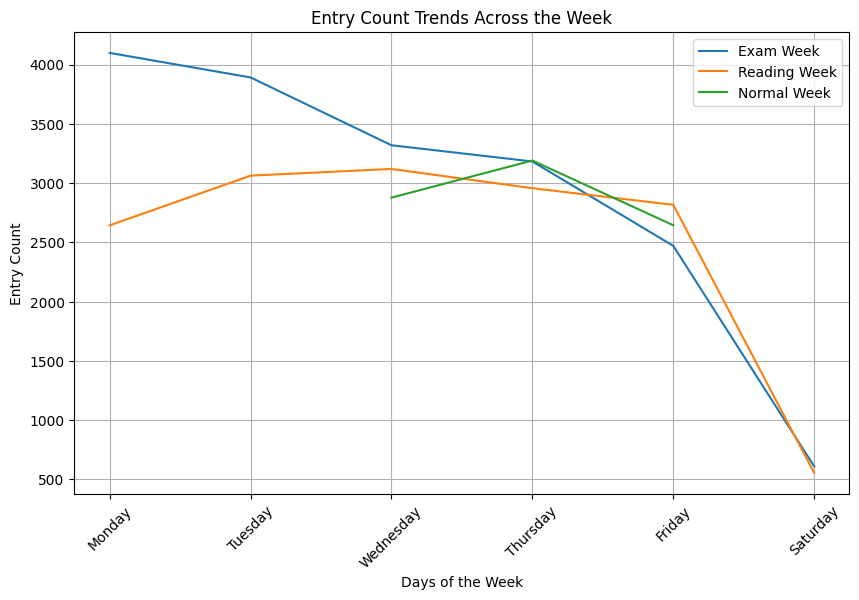

In [23]:
#visualisation
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(exam_daily_entry_counts_df['Day_of_Week'], exam_daily_entry_counts_df['Entry_Count'], label="Exam Week")
ax.plot(reading_daily_entry_counts_df['Day_of_Week'], reading_daily_entry_counts_df['Entry_Count'], label="Reading Week")
ax.plot(normal_daily_entry_counts_df['Day_of_Week'], normal_daily_entry_counts_df['Entry_Count'], label="Normal Week")
ax.set_xlabel("Days of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()


Exam weeks shows a surge in library entries, indicating heightened occupancy. However, as the week progresses into Friday and Saturday, the entry counts noticeably diminish compared to the peak observed during exam weeks. This decline aligns with the conclusion of exams, possibly suggesting that a substantial portion of the student population might have completed their examinations by this time, resulting in reduced footfall at the library. This information can aid the library in resource management, event planning, and spatial layout, allowing for tailored preparations to accommodate fluctuations in student presence across different weeks. 

In [24]:
def filter_by_cat(df):
    unique_broad_categories = df['Broad Category'].unique()
    category_dataframes = {} 
    for category in unique_broad_categories:
        category_df = df[df['Broad Category'] == category]
        category_dataframes[category] = category_df
    return category_dataframes

In [25]:
#split into cat
exam_split_df = filter_by_cat(exam_week_df)
keys = exam_split_df.keys()
for key in keys:
    exam_split_df[key] = entry_count_finder(exam_split_df[key])

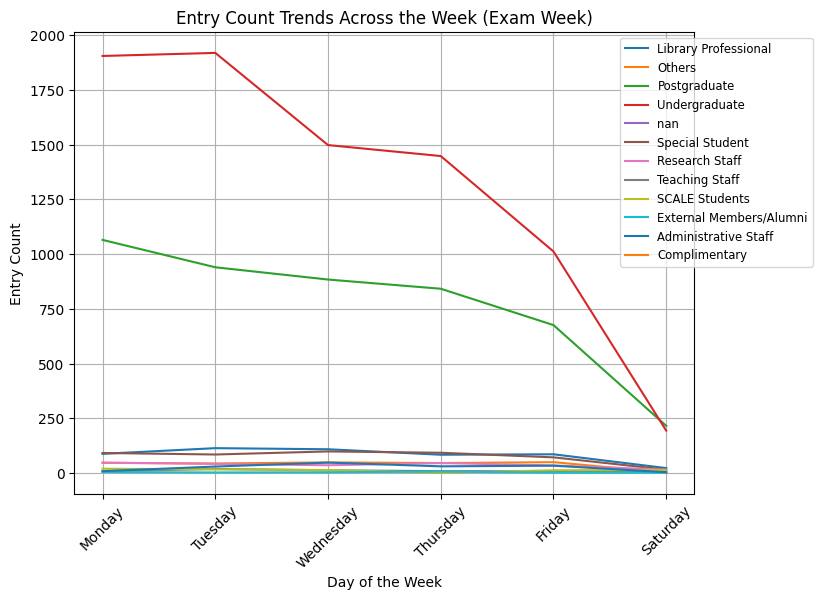

In [26]:
#Visualise
fig, ax = plt.subplots(figsize=(8, 6))
# Iterate through the categories and plot them
for category, df in exam_split_df.items():
    ax.plot(df['Day_of_Week'], df['Entry_Count'], label=category)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week (Exam Week)")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize = 'small')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The plot shows the distribution of entries across various categories. This data distribution is pivotal in guiding the collection methodology, aiming for a more comprehensive and generalized model. Focusing on the majority representation of undergraduates allows for a more accurate and encompassing approach to data collection, facilitating the creation of models that better reflect their behavioral patterns during the exam week.

In [27]:
exam_week_df.head()

,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number,Week_type,Occupancy
89429,2023-04-24 06:46:52+08:00,6582.0,Library Professional,Central Library,Card,Entry,1,2023-04-24,Monday,17,Exam,1
89431,2023-04-24 07:05:31+08:00,2255.0,Library Professional,Central Library,Card,Entry,1,2023-04-24,Monday,17,Exam,2
89432,2023-04-24 07:11:14+08:00,4381.0,Library Professional,Central Library,Card,Entry,1,2023-04-24,Monday,17,Exam,3
89433,2023-04-24 07:11:15+08:00,8843.0,Library Professional,Central Library,Card,Entry,1,2023-04-24,Monday,17,Exam,4
89435,2023-04-24 07:22:56+08:00,30.0,Others,Central Library,Card,Entry,1,2023-04-24,Monday,17,Exam,5


In [28]:
reading_week_df.head()

,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number,Week_type,Occupancy
18669,2023-02-18 09:46:42+08:00,6872.0,Library Professional,Central Library,Card,Entry,1,2023-02-18,Saturday,07,Reading,1
18670,2023-02-18 09:46:55+08:00,6872.0,Library Professional,Central Library,Card,Exit,-1,2023-02-18,Saturday,07,Reading,0
18671,2023-02-18 09:55:22+08:00,6872.0,Library Professional,Central Library,QR,Entry,1,2023-02-18,Saturday,07,Reading,1
18672,2023-02-18 09:56:29+08:00,6872.0,Library Professional,Central Library,QR,Entry,1,2023-02-18,Saturday,07,Reading,2
18674,2023-02-18 09:57:42+08:00,4860.0,Postgraduate,Central Library,QR,Entry,1,2023-02-18,Saturday,07,Reading,3


In [29]:
reading_week_split_df = filter_by_cat(reading_week_df)
keys = reading_week_split_df.keys()
for key in keys:
    reading_week_split_df[key] = entry_count_finder(reading_week_split_df[key])

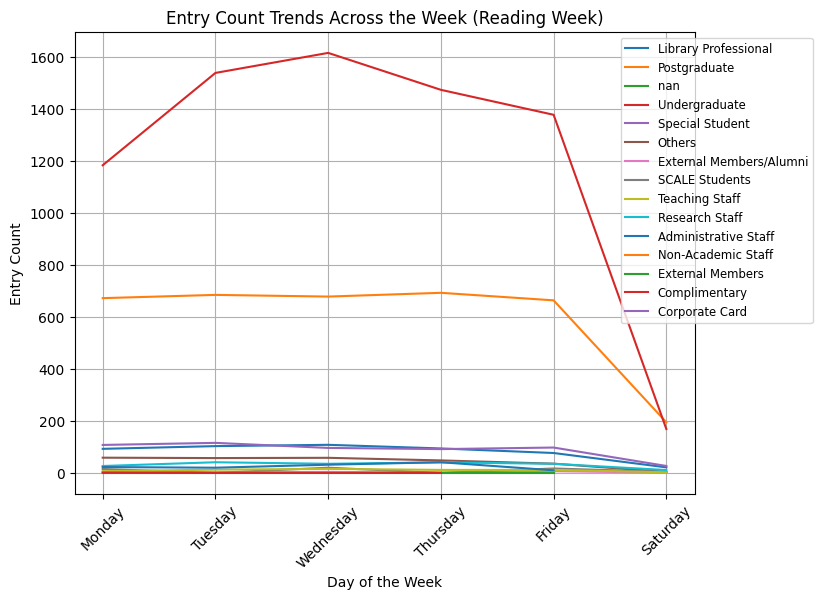

In [30]:
#Visualise
fig, ax = plt.subplots(figsize=(8, 6))
# Iterate through the categories and plot them
for category, df in reading_week_split_df.items():
    ax.plot(df['Day_of_Week'], df['Entry_Count'], label=category)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week (Reading Week)")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize = 'small')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [31]:
normal_week_split_df = filter_by_cat(normal_week_df)
keys = normal_week_split_df.keys()
for key in keys:
    normal_week_split_df[key] = entry_count_finder(normal_week_split_df[key])

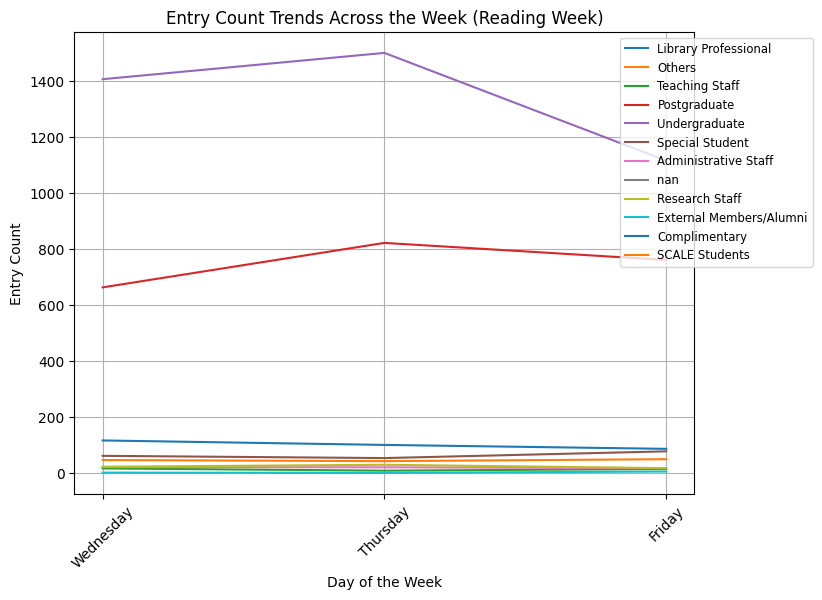

In [32]:
#Visualise
fig, ax = plt.subplots(figsize=(8, 6))
# Iterate through the categories and plot them
for category, df in normal_week_split_df.items():
    ax.plot(df['Day_of_Week'], df['Entry_Count'], label=category)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week (Reading Week)")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize = 'small')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

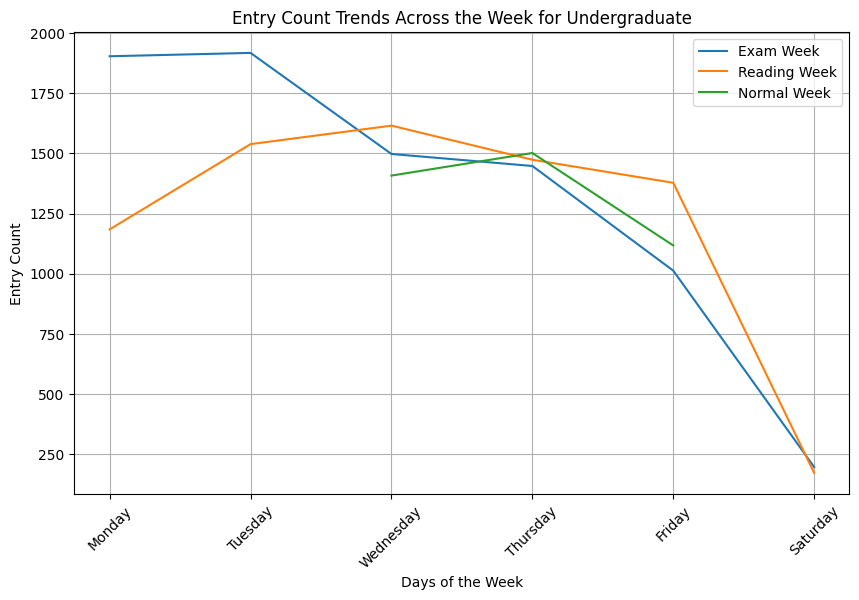

In [33]:
#visualisation
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(exam_split_df['Undergraduate']['Day_of_Week'], exam_split_df['Undergraduate']['Entry_Count'], label="Exam Week")
ax.plot(reading_week_split_df['Undergraduate']['Day_of_Week'], reading_week_split_df['Undergraduate']['Entry_Count'], label="Reading Week")
ax.plot(normal_week_split_df['Undergraduate']['Day_of_Week'], normal_week_split_df['Undergraduate']['Entry_Count'], label="Normal Week")
ax.set_xlabel("Days of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week for Undergraduate")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [34]:
taps_df = pd.read_csv('../Data/20230413_clb_taps.csv')
taps_df['Datetime'] = pd.to_datetime(taps_df['Datetime'])
sgt_timezone = pytz.timezone('Asia/Singapore')
taps_df['Datetime'] = taps_df['Datetime'].dt.tz_convert(sgt_timezone)
taps_df = taps_df.sort_values('Datetime')
taps_df

,Datetime,Device Code,Direction
6053,2023-04-13 06:57:39+08:00,RT046205,Entry
4898,2023-04-13 07:21:44+08:00,RT046205,Entry
4899,2023-04-13 07:21:46+08:00,RT046203,Entry
0,2023-04-13 07:24:03+08:00,RT046205,Entry
2294,2023-04-13 07:30:41+08:00,RT046205,Entry
...,...,...,...
6052,2023-04-13 20:56:40+08:00,RT046204,Exit
3445,2023-04-13 20:56:42+08:00,RT046206,Exit
4897,2023-04-13 20:57:41+08:00,LBCTR,Exit
8579,2023-04-13 20:57:59+08:00,RT046204,Exit


In [35]:
gates_df = pd.read_excel('../Data/cl_gates.xlsx')
gates_df

,Device Code,Library,Level,Gate/Direction,Access Type,Remarks
0,RT046201,Central Library,L1,Turnstile 1 Entry,Card,L1 main entrance
1,RT046202,Central Library,L1,Turnstile 1 Exit,Card,L1 main entrance
2,RT046203,Central Library,L1,Turnstile 2 Entry,Card,L1 main entrance
3,RT046204,Central Library,L1,Turnstile 2 Exit,Card,L1 main entrance
4,RT046205,Central Library,L1,Turnstile 3 Entry,Card,L1 main entrance
5,RT046206,Central Library,L1,Turnstile 3 Exit,Card,L1 main entrance
6,RT046207,Central Library,L1,Turnstile 4 Entry,NaN,L1 RBR
7,RT046208,Central Library,L1,Turnstile 4 Exit,NaN,L1 RBR
8,RT061801,Central Library,L4,Turnstile 1 Entry,Card,L4 entrance
9,RT061802,Central Library,L4,Turnstile 1 Exit,Card,L4 entrance


In [36]:
merged_df = taps_df.merge(gates_df, on='Device Code', how='left')
merged_df

,Datetime,Device Code,Direction,Library,Level,Gate/Direction,Access Type,Remarks
0,2023-04-13 06:57:39+08:00,RT046205,Entry,Central Library,L1,Turnstile 3 Entry,Card,L1 main entrance
1,2023-04-13 07:21:44+08:00,RT046205,Entry,Central Library,L1,Turnstile 3 Entry,Card,L1 main entrance
2,2023-04-13 07:21:46+08:00,RT046203,Entry,Central Library,L1,Turnstile 2 Entry,Card,L1 main entrance
3,2023-04-13 07:24:03+08:00,RT046205,Entry,Central Library,L1,Turnstile 3 Entry,Card,L1 main entrance
4,2023-04-13 07:30:41+08:00,RT046205,Entry,Central Library,L1,Turnstile 3 Entry,Card,L1 main entrance
...,...,...,...,...,...,...,...,...
9641,2023-04-13 20:56:40+08:00,RT046204,Exit,Central Library,L1,Turnstile 2 Exit,Card,L1 main entrance
9642,2023-04-13 20:56:42+08:00,RT046206,Exit,Central Library,L1,Turnstile 3 Exit,Card,L1 main entrance
9643,2023-04-13 20:57:41+08:00,LBCTR,Exit,Central Library,L1/L4,NaN,QR code,Central Library entrances (L1 and L4)
9644,2023-04-13 20:57:59+08:00,RT046204,Exit,Central Library,L1,Turnstile 2 Exit,Card,L1 main entrance


In [37]:
level_counts_total = merged_df.groupby('Level')['Direction'].count()
level_counts_total_df = pd.DataFrame({'Level': level_counts_total.index, 'Count': level_counts_total.values})
level_counts_total_df

,Level,Count
0,L1,3057
1,L1/L4,2448
2,L4,2543
3,L6,1598


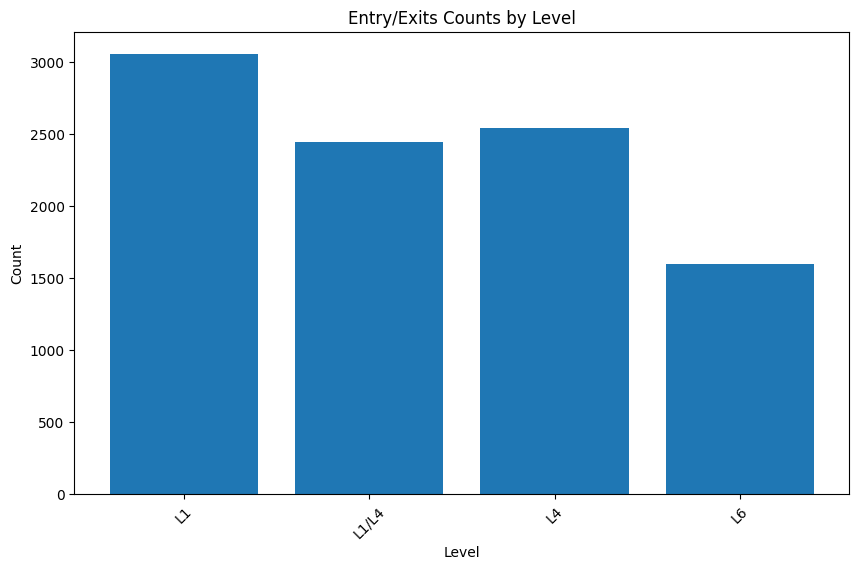

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(level_counts_total_df['Level'], level_counts_total_df['Count'])
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Entry/Exits Counts by Level')
plt.xticks(rotation=45)
plt.show()

The bar plot provides a visual representation of entry counts across different levels, serving as a cross-reference tool to validate survey accuracy. This comparison aids in ensuring the reliability of survey data and offers potential insights for enhancing traffic flow. Additionally, we can use this to contribute valuable input to the refinement of the MESA agent model using this distribution. As we can see from the barplot, the L6 gate is under-utilise compared to the other gates and the possible congestion.

In [39]:
level_counts_entry = merged_df[merged_df['Direction'] == 'Entry'].groupby('Level')['Direction'].count()
level_counts_entry_df = pd.DataFrame({'Level': level_counts_entry.index, 'Count': level_counts_entry.values})
level_counts_entry_df

,Level,Count
0,L1,1679
1,L1/L4,1286
2,L4,1236
3,L6,721


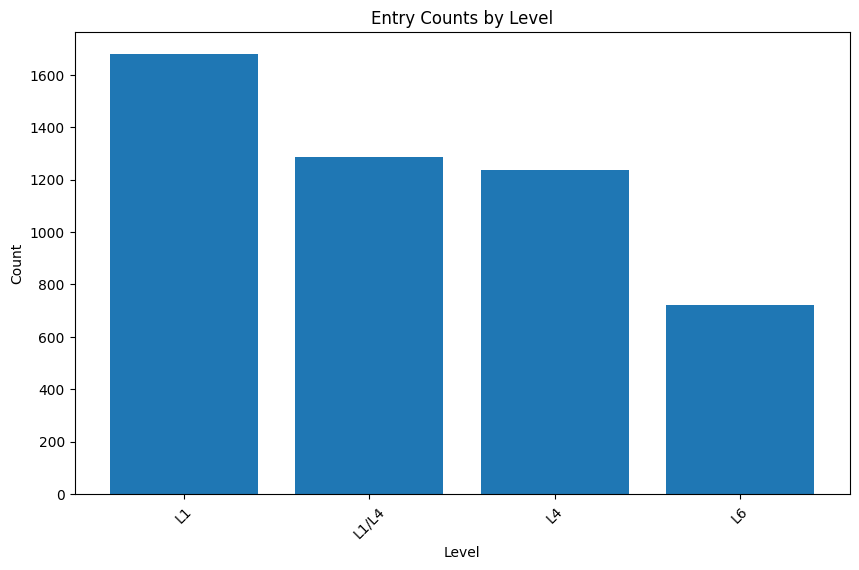

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(level_counts_entry_df['Level'], level_counts_entry_df['Count'])
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Entry Counts by Level')
plt.xticks(rotation=45)
plt.show()

In [41]:
level_counts_exit = merged_df[merged_df['Direction'] == 'Exit'].groupby('Level')['Direction'].count()
level_counts_exit_df = pd.DataFrame({'Level': level_counts_exit.index, 'Count': level_counts_exit.values})
level_counts_exit_df

,Level,Count
0,L1,1378
1,L1/L4,1162
2,L4,1307
3,L6,877


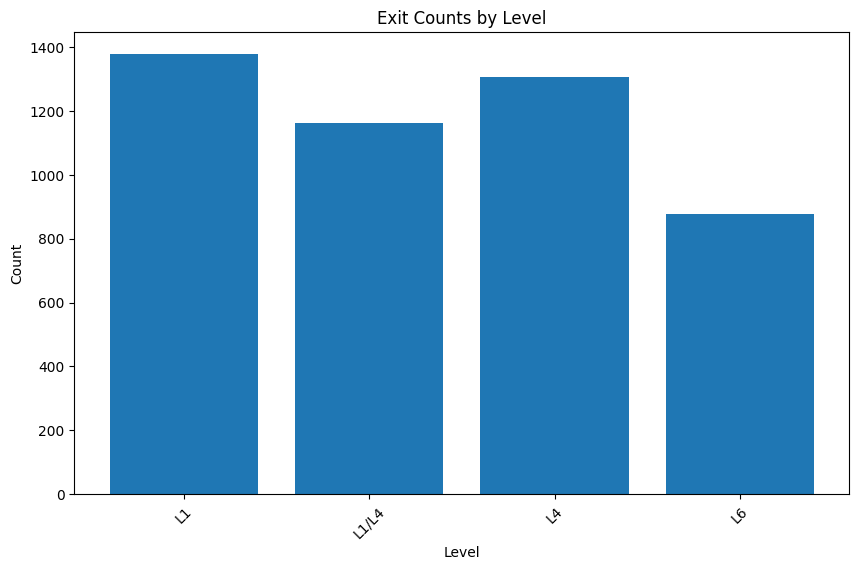

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(level_counts_exit_df['Level'], level_counts_exit_df['Count'])
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Exit Counts by Level')
plt.xticks(rotation=45)
plt.show()

In [43]:
#time distribution
new_df2

,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number,Week_type,Occupancy
0,2023-01-25 07:29:13+08:00,2483.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,1
1,2023-01-25 07:32:15+08:00,4372.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,2
2,2023-01-25 07:32:35+08:00,2.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,3
3,2023-01-25 07:32:45+08:00,7405.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,4
4,2023-01-25 07:32:49+08:00,2182.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,5
...,...,...,...,...,...,...,...,...,...,...,...,...
127874,2023-04-29 17:00:52+08:00,7423.0,Library Professional,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Exam,80
127913,2023-04-29 17:36:09+08:00,6427.0,Undergraduate,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Exam,81
127914,2023-04-29 17:37:28+08:00,4318.0,Administrative Staff,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Exam,82
127917,2023-04-29 17:38:18+08:00,4318.0,Administrative Staff,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Exam,81
